In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
laptop = pd.read_csv('/Users/nilavo/Project : Prectical/Machine Learning/Laptop price predictor/laptop_data.csv')
laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
# Checking how many null values in every column
laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
# Checking how many duplicate rows in dataset
laptop.duplicated().sum()

0

In [5]:
laptop.drop(columns='Unnamed: 0', inplace=True)

In [6]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
# Checking columns datatype
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


Company Column

In [8]:
laptop['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

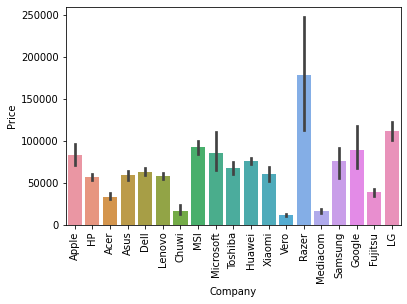

In [9]:
# Average price of each Company
sbn.barplot(x='Company', y='Price', data=laptop)
plt.xticks(rotation = 'vertical');

TypeName Column

In [10]:
laptop['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

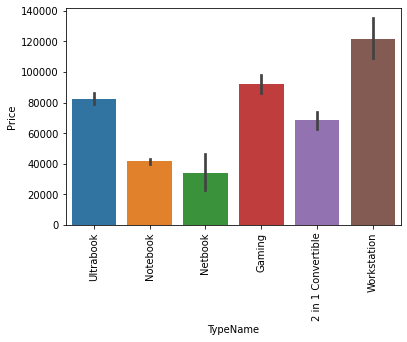

In [11]:
# Average price of each Type
sbn.barplot(x='TypeName', y='Price', data= laptop)
plt.xticks(rotation='vertical');

Inches Column

In [12]:
laptop['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

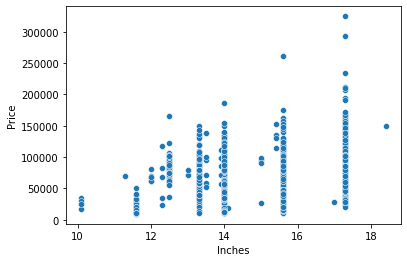

In [13]:
# Inches vs Price
sbn.scatterplot( x='Inches', y='Price', data=laptop);

Ram and Weight Column

In [14]:
# Changing 2 columns
laptop['Ram'] = laptop['Ram'].str.replace('GB','').astype('int32')
laptop['Weight'] = laptop['Weight'].str.replace('kg','').astype('float32')

In [15]:
laptop.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [16]:
laptop['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

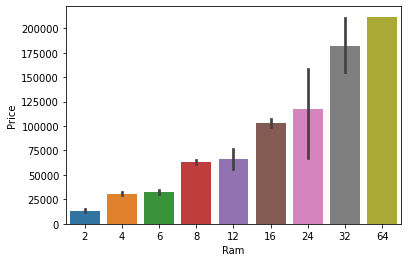

In [17]:
# Ram vs average Price
sbn.barplot( x='Ram', y='Price', data=laptop);

In [18]:
laptop['Weight'].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: Weight, Length: 171, dtype: int64

/Users/nilavo/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


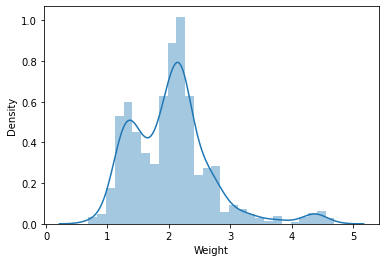

In [19]:
sbn.distplot(laptop['Weight']);

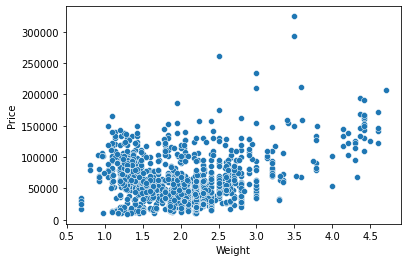

In [20]:
# Weight vs average Price
sbn.scatterplot( x='Weight', y='Price', data=laptop);

In [21]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Screen Resolution Column

In [22]:
# Checking different type of ScreenResolution
laptop.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [23]:
# Creating 2 new columns from ScreenResolution
laptop['Touchscreen'] = laptop['ScreenResolution'].apply(lambda x:'Yes' if 'Touchscreen' in x else 'No')
laptop['IPS'] = laptop['ScreenResolution'].apply(lambda x:'Yes' if 'IPS' in x else 'No')

Touchscreen Column (New column)

In [24]:
laptop['Touchscreen'].value_counts()

No     1111
Yes     192
Name: Touchscreen, dtype: int64

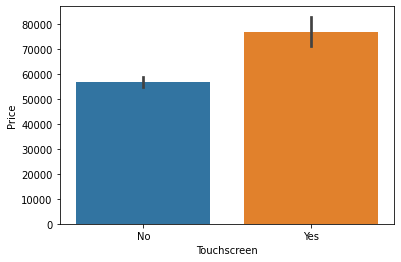

In [25]:
# Touchscreen vs Price
sbn.barplot( x='Touchscreen', y='Price', data=laptop);

Ips Column (New column)

In [26]:
laptop['IPS'].value_counts()

No     938
Yes    365
Name: IPS, dtype: int64

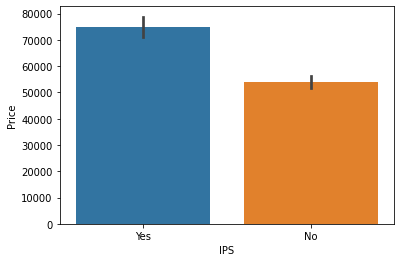

In [27]:
# IPS vs Price
sbn.barplot( x='IPS', y='Price', data=laptop);

In [28]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
677,HP,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,8,64GB Flash Storage,Intel HD Graphics 500,Chrome OS,1.40,26373.600,Yes,No
855,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.90,50349.600,No,No
789,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.62,52480.800,No,No
1092,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85194.720,No,Yes
15,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,80908.344,No,Yes


Extracting X_resolution from ScreenResolution

In [29]:
new = laptop['ScreenResolution'].str.split('x')

In [30]:
new

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [31]:
new[0]

['IPS Panel Retina Display 2560', '1600']

In [32]:
new[0][0]

'IPS Panel Retina Display 2560'

In [33]:
list_x = np.empty(1303)
l = 0
for i in np.arange(0,1303):
    list_x[l] = new[i][0].split(' ')[-1]
    l = l+1

In [34]:
list_x

array([2560., 1440., 1920., ..., 1366., 1366., 1366.])

In [35]:
laptop['X_res'] = list_x

In [36]:
laptop.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,2560.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,1440.0


In [37]:
# Checking X_res column's data type
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   object 
 12  IPS               1303 non-null   object 
 13  X_res             1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), object(9)
memory usage: 132.5+ KB


In [38]:
# Changing X_res column's data type to integer
laptop['X_res'] = laptop['X_res'].astype('int32')

In [39]:
laptop.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,1440


In [40]:
#Extracting Y_resolution from ScreenResolution
list_y = np.empty(1303)
l = 0
for i in np.arange(0,1303):
    list_y[l] = new[i][1].split(' ')[0]
    l = l+1

laptop['Y_res'] = list_y

# Changing Y_res column's data type to integer
laptop['Y_res'] = laptop['Y_res'].astype('int32')

In [41]:
laptop.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,1440,900


In [42]:
laptop.shape

(1303, 15)

In [43]:
# Calculating PPI from X_res, y_res and Inches
laptop['ppi'] = ((laptop['X_res']**2) + (laptop['Y_res']**2))**0.5/laptop['Inches']
laptop.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,1440,900,127.677940


In [44]:
# Dropping used columns(useless now)
laptop.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [45]:
laptop.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,127.677940


Cpu Column

In [46]:
# Checking different Cpu types
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [47]:
# Modify Cpu column
laptop['Cpu'] = laptop['Cpu'].apply(lambda x:'Intel Core i5' if 'Intel Core i5' in x else ('Intel Core i7' if 'Intel Core i7' in x else ('Intel Core i3' if 'Intel Core i3' in x else ('Other Intel Processor' if 'Intel' in x else 'AMD Processor'))))

In [48]:
laptop.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,226.983005
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,127.677940


In [49]:
laptop['Cpu'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu, dtype: int64

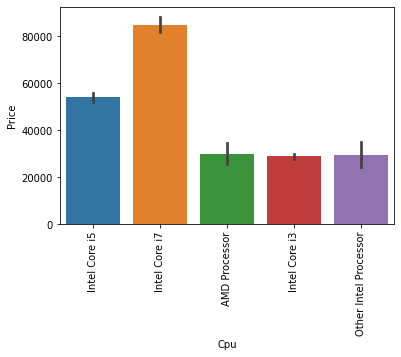

In [50]:
# Average Price of different type Cpu's  
sbn.barplot(x='Cpu', y='Price', data=laptop)
plt.xticks(rotation='vertical');


Memory Column

In [51]:
# Checking different Memory types
laptop['Memory'].value_counts()

256GB SSD                       412
1TB HDD                         223
500GB HDD                       132
512GB SSD                       118
128GB SSD + 1TB HDD              94
128GB SSD                        76
256GB SSD + 1TB HDD              73
32GB Flash Storage               38
2TB HDD                          16
64GB Flash Storage               15
512GB SSD + 1TB HDD              14
1TB SSD                          14
256GB SSD + 2TB HDD              10
1.0TB Hybrid                      9
256GB Flash Storage               8
16GB Flash Storage                7
32GB SSD                          6
180GB SSD                         5
128GB Flash Storage               4
512GB SSD + 2TB HDD               3
16GB SSD                          3
512GB Flash Storage               2
1TB SSD + 1TB HDD                 2
256GB SSD + 500GB HDD             2
128GB SSD + 2TB HDD               2
256GB SSD + 256GB SSD             2
512GB SSD + 256GB SSD             1
512GB SSD + 512GB SSD       

In [52]:
# Extracting different types of memory and store in different columns
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
new1 = laptop["Memory"].str.split("+", n = 1, expand = True)

laptop["first"]= new1[0]
laptop["first"]=laptop["first"].str.strip()

laptop["second"]= new1[1]

laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['first'] = laptop['first'].str.replace(r'\D', '')

laptop["second"].fillna("0", inplace = True)

laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['second'] = laptop['second'].str.replace(r'\D', '')

laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

laptop["HDD"]=(laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"])
laptop["SSD"]=(laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"])
laptop["Hybrid"]=(laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"])
laptop["Flash_Storage"]=(laptop["first"]*laptop["Layer1Flash_Storage"]+laptop["second"]*laptop["Layer2Flash_Storage"])

laptop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/var/folders/d8/9p7yb1wn27l_2y2lp6pcbdz00000gn/T/ipykernel_18166/1360666171.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['first'] = laptop['first'].str.replace(r'\D', '')
/var/folders/d8/9p7yb1wn27l_2y2lp6pcbdz00000gn/T/ipykernel_18166/1360666171.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['second'] = laptop['second'].str.replace(r'\D', '')


In [53]:
laptop.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,226.983005,0,128,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,127.677940,0,0,0,128


In [54]:
laptop.drop(columns=['Memory'],inplace=True)

In [55]:
laptop.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [56]:
laptop.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [57]:
laptop.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,226.983005,0,128
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,141.211998,0,256
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,220.534624,0,512
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,226.983005,0,256


HDD Column (New column)

In [58]:
laptop['HDD'].value_counts()

0       727
1000    408
500     134
2000     32
32        1
128       1
Name: HDD, dtype: int64

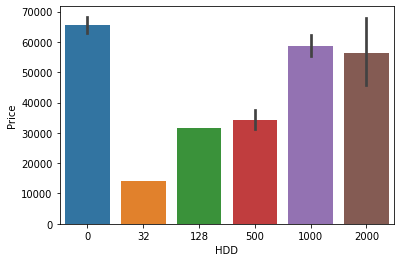

In [59]:
# HDD(memory) vs average Price
sbn.barplot( x='HDD', y='Price', data=laptop);

SSD Column (New column)

In [60]:
laptop['SSD'].value_counts()

256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

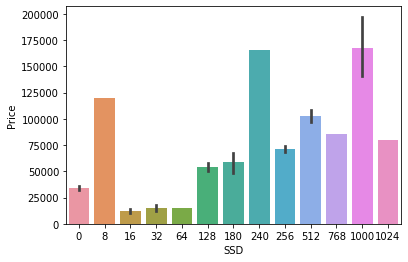

In [61]:
# SSD(memory) vs average Price
sbn.barplot( x='SSD', y='Price', data=laptop);

Gpu Column

In [62]:
laptop['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [63]:
laptop['Gpu brand'] = laptop['Gpu'].apply(lambda x:x.split()[0])
laptop.head(2)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Gpu brand
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,226.983005,0,128,Intel
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,127.677940,0,0,Intel


In [64]:
laptop['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [65]:
laptop[laptop['Gpu brand'] == 'ARM']

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,AMD Processor,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,Yes,Yes,234.5074,0,0,ARM


In [66]:
laptop[laptop['Gpu brand'] != 'ARM']

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Gpu brand
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,226.983005,0,128,Intel
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,127.677940,0,0,Intel
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,141.211998,0,256,Intel
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,220.534624,0,512,AMD
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,226.983005,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Yes,Yes,157.350512,0,128,Intel
1299,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Yes,Yes,276.053530,0,512,Intel
1300,Lenovo,Notebook,Other Intel Processor,2,Intel HD Graphics,Windows 10,1.50,12201.1200,No,No,111.935204,0,0,Intel
1301,HP,Notebook,Intel Core i7,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,No,No,100.454670,1000,0,AMD


In [67]:
laptop = laptop[laptop['Gpu brand'] != 'ARM']

In [68]:
laptop['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

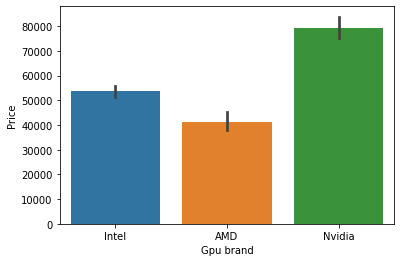

In [69]:
# Gpu brand vs average Price
sbn.barplot( x='Gpu brand', y='Price', data=laptop);

In [70]:
laptop.drop(columns=['Gpu'],inplace=True)

/Users/nilavo/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [71]:
laptop.head(2)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Gpu brand
0,Apple,Ultrabook,Intel Core i5,8,macOS,1.37,71378.6832,No,Yes,226.983005,0,128,Intel
1,Apple,Ultrabook,Intel Core i5,8,macOS,1.34,47895.5232,No,No,127.677940,0,0,Intel


OpSys Column

In [72]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [73]:
# Modify OpSys column
laptop['OS'] = laptop['OpSys'].apply(lambda x:'Windows' if 'Windows' in x else ('Mac' if 'mac' in x else ('Mac' if 'Mac' in x else('Linux' if 'Linux' in x else ('Chrome' if 'Chrome' in x else 'Other OS')))))

/var/folders/d8/9p7yb1wn27l_2y2lp6pcbdz00000gn/T/ipykernel_18166/425200417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['OS'] = laptop['OpSys'].apply(lambda x:'Windows' if 'Windows' in x else ('Mac' if 'mac' in x else ('Mac' if 'Mac' in x else('Linux' if 'Linux' in x else ('Chrome' if 'Chrome' in x else 'Other OS')))))


In [74]:
laptop.drop(columns='OpSys', inplace=True)

/Users/nilavo/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
laptop['OS'].value_counts()

Windows     1125
Other OS      68
Linux         62
Chrome        26
Mac           21
Name: OS, dtype: int64

In [76]:
laptop.head(2)

,Company,TypeName,Cpu,Ram,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,Intel Core i5,8,1.37,71378.6832,No,Yes,226.983005,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,8,1.34,47895.5232,No,No,127.677940,0,0,Intel,Mac


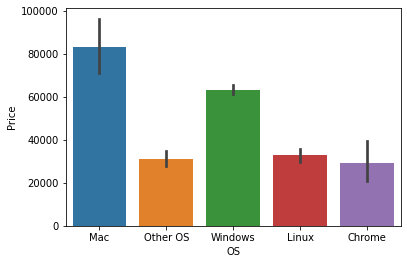

In [77]:
# OS vs average Price
sbn.barplot( x='OS', y='Price', data=laptop);

In [78]:
laptop.corr()['Price']

Ram       0.742905
Weight    0.209867
Price     1.000000
ppi       0.475368
HDD      -0.096891
SSD       0.670660
Name: Price, dtype: float64

<AxesSubplot:>

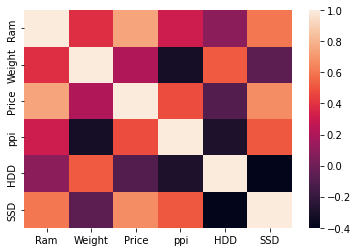

In [79]:
sbn.heatmap(laptop.corr())

/Users/nilavo/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


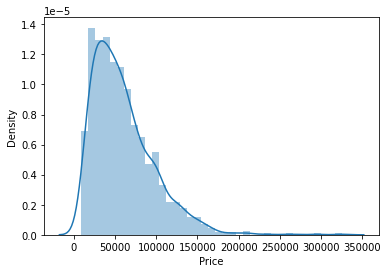

In [80]:
# Price freqency plot
sbn.distplot(laptop.Price);

/Users/nilavo/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


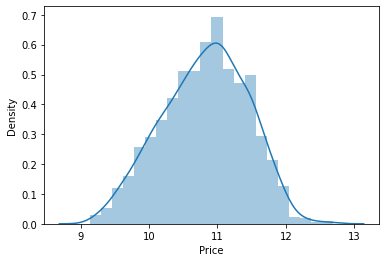

In [81]:
# Removing Skewness by taking log of price
sbn.distplot(np.log(laptop.Price));

In [83]:
# Saving preprocessed DataFrame
laptop.to_csv('laptop_preprocessed.csv', index=False)